# ch3.3编程实现对率回归
编程实现对率回归，并给出西瓜数据集3.0alpha上的结果

In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# formula 3.27
def loglikelihood(x,y,beta):
    sum_ll = 0
    for i in range(x.shape[1]):
        x1 = np.reshape(x[:,i],[len(x),1])
        beta_x = float(np.dot(beta.T,x1))
        sum_ll += -y[i]*beta_x + np.log(1+np.exp(beta_x))
    return sum_ll

# formula 3.30, 3.31
def derivation(x,y,beta):
    num_features = x.shape[0]
    dbeta = np.zeros([num_features])
    d2beta = np.zeros([num_features, num_features])
    for i in range(len(y)):
        e_beta = float(np.exp(np.dot(beta.T, x[:,i])))
        p1 = e_beta/(1+e_beta)
        dbeta -= x[:,i]*(y[i]-p1)
        x1 = np.reshape(x[:,i],[len(x[:,i]),1])
        x2 = np.dot(x1,x1.T)
        d2beta += x2*p1*(1-p1)
    return np.reshape(dbeta,[len(dbeta),1]),d2beta


In [17]:
def get_x_y(x,y):
    plt_x0 = []
    plt_y0 = []
    plt_x1 = []
    plt_y1 = []
    for i in range(len(y)):
        if y[i] == 0:
            plt_x0.append(x[i,0])
            plt_y0.append(x[i,1])
        if y[i] == 1:
            plt_x1.append(x[i,0])
            plt_y1.append(x[i,1])
    return plt_x0, plt_y0, plt_x1, plt_y1

def plot_boundary(x,y,x_train, y_train, x_test, y_test, beta):
    xx, yy = np.meshgrid(np.arange(min(x[:,0])-0.1, max(x[:,0])+0.1, 0.01),
                         np.arange(min(x[:,1])-0.1, max(x[:,1])+0.1, 0.01))
    zz = beta[0]*xx + beta[1]*yy + beta[2]
    f1 = plt.figure(1)   
    plt.title('watermelon_3a')  
    plt.xlabel('density')  
    plt.ylabel('ratio_sugar')  
    plt.contourf(xx,yy,zz)  
    plt_x0, plt_y0, plt_x1, plt_y1 = get_x_y(x_train, y_train)
    plt_xt0, plt_yt0, plt_xt1, plt_yt1 = get_x_y(x_test, y_test)
    plt.scatter(plt_x0, plt_y0, marker = 'o', color = 'red', s=30, label = 'train_bad')
    plt.scatter(plt_x1, plt_y1, marker = 'o', color = 'g', s=30, label = 'train_good')
    plt.scatter(plt_xt0, plt_yt0, marker = 'x', color = 'red', s=30, label = 'test_bad')
    plt.scatter(plt_xt1, plt_yt1, marker = 'x', color = 'g', s=30, label = 'test_good')
    plt.legend(loc = 'upper right')
    plt.show()

## 读取，划分数据集

In [2]:
dataset = np.loadtxt('data/watermelon_3_0_alpha.txt',delimiter=',')
x = dataset[:,1:3]
num_features = x.shape[1]
x = np.insert(x,2,values=1,axis=1)
x = x
y = dataset[:, 3]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.5, random_state=0)

### 自己编写的牛顿迭代法的结果

In [3]:
beta = np.zeros([num_features+1,1])
beta[2] = 1

n_iter = 100
ll_old = 0
for i in range(n_iter):
    ll = loglikelihood(x_train.T,y_train.T,beta)    
    if np.abs(ll-ll_old) <= 0.0000001:
        break
    ll_old = ll
    dbeta, d2beta = derivation(x_train.T,y_train.T,beta)
    # formula 3.29
    beta = beta - np.dot(linalg.inv(d2beta), dbeta)
print(i, beta)

19 [[ -85.35092276]
 [ 390.44165894]
 [ -27.50567487]]


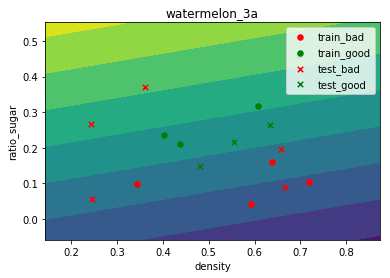

In [19]:
plot_boundary(x,y,x_train, y_train, x_test, y_test, np.ravel(beta))

### 调用sklearn库的结果

[[-0.0825445   0.39557096 -0.01393502]]


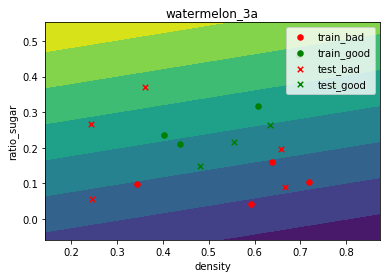

In [20]:
log_model = LogisticRegression() 
log_model.fit(x_train, y_train) 
print(log_model.coef_)
plot_boundary(x,y,x_train, y_train, x_test, y_test, np.ravel(log_model.coef_))